# Problem Statement
We have a client who has a website where people write different reviews for technical 
products. Now they are adding a new feature to their website i.e. The reviewer will have to 
add stars(rating) as well with the review. The rating is out 5 stars and it only has 5 options 
available 1 star, 2 stars, 3 stars, 4 stars, 5 stars. Now they want to predict ratings for the 
reviews which were written in the past and they don’t have a rating. So, we have to build an 
application which can predict the rating by seeing the review.

# Data
The entire data is scrapped from multiple e-commerce websites  
* It has five target class(multi-class classification problem)


In [7]:
!pip install Unidecode

In [8]:
#Getting tools ready
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.combine import SMOTEENN
import nltk
from word2number import w2n
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import token
import re
import string
import unidecode
from wordcloud import WordCloud
from bs4 import BeautifulSoup as bs

In [10]:
df1 = pd.read_csv('Ratings_Prediction_Amazon.csv')

In [11]:
df1.head()

,Unnamed: 0,Ratings,Full_review
0,0,1.0,Bought the Mi Ultra laptop during the first sa...
1,1,5.0,Pros:\n1) Build quality.\n2) Display (best I h...
2,2,1.0,"Overall product is good, but charger is missin..."
3,3,5.0,Thanks to livetre.com who's reviewing this lap...
4,4,1.0,You will not get an option to buy extended wa...


In [12]:
df1.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20442 entries, 0 to 20441
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   20442 non-null  int64  
 1   Ratings      20442 non-null  float64
 2   Full_review  20148 non-null  object 
dtypes: float64(1), int64(1), object(1)
memory usage: 479.2+ KB


In [13]:
df1.drop(df1[df1['Ratings'] == '★'].index, inplace = True)

In [14]:
df1['Ratings'] = df1['Ratings'].astype('float')

In [15]:
df1['Ratings'] = round(df1['Ratings'])

In [16]:
df = df1

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20442 entries, 0 to 20441
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   20442 non-null  int64  
 1   Ratings      20442 non-null  float64
 2   Full_review  20148 non-null  object 
dtypes: float64(1), int64(1), object(1)
memory usage: 638.8+ KB


In [18]:
df.Ratings.value_counts()

5.0    7306
1.0    6670
4.0    3267
3.0    1936
2.0    1263
Name: Ratings, dtype: int64

In [19]:
df.drop_duplicates(subset = 'Full_review', inplace = True)

In [20]:
df.Ratings.value_counts()

5.0    2763
1.0    2386
4.0    1223
3.0     682
2.0     466
Name: Ratings, dtype: int64

In [21]:
df.dropna(inplace = True)

In [22]:
#visualizing the count of words in each row
df['word_count'] = [len(word.split()) for word in df['Full_review']]

In [23]:
df.head()

,Unnamed: 0,Ratings,Full_review,word_count
0,0,1.0,Bought the Mi Ultra laptop during the first sa...,391
1,1,5.0,Pros:\n1) Build quality.\n2) Display (best I h...,65
2,2,1.0,"Overall product is good, but charger is missin...",17
3,3,5.0,Thanks to livetre.com who's reviewing this lap...,119
4,4,1.0,You will not get an option to buy extended wa...,60


# Visualization

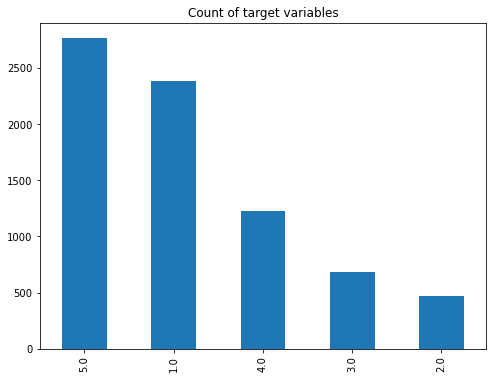

In [24]:
plt.figure(figsize = (8,6))
df['Ratings'].value_counts().plot(kind = 'bar')
plt.title('Count of target variables');

* Data is imbalanced

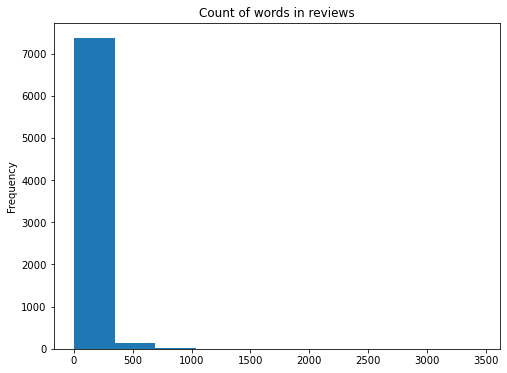

In [25]:
plt.figure(figsize = (8,6))
df['word_count'].plot.hist()
plt.title('Count of words in reviews');

## Before cleaning words visualization

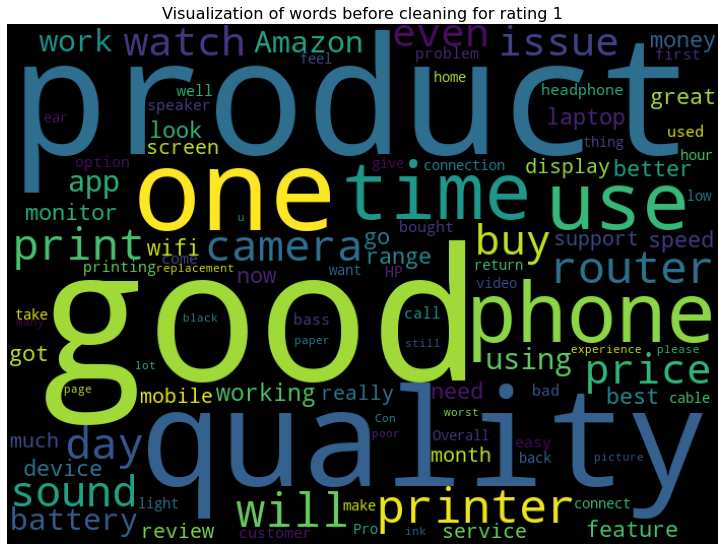

In [26]:
rat1 = df['Full_review'][df['Ratings'] == 1]
news = WordCloud(width = 700, height = 512, max_words = 100, prefer_horizontal=1, collocations= False, ).generate(' '.join(rat1))
plt.figure(figsize = (15,8))
plt.imshow(news)
plt.title('Visualization of words before cleaning for rating 1', fontsize = 16)
plt.tight_layout()
plt.axis('off');

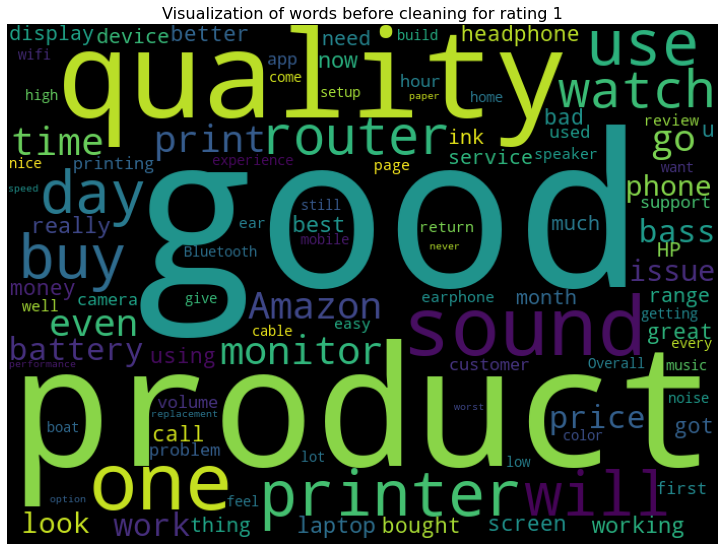

In [27]:
rat2 = df['Full_review'][df['Ratings'] == 2]
news = WordCloud(width = 700, height = 512, max_words = 100, prefer_horizontal=1, collocations= False, ).generate(' '.join(rat2))
plt.figure(figsize = (15,8))
plt.imshow(news)
plt.title('Visualization of words before cleaning for rating 1', fontsize = 16)
plt.tight_layout()
plt.axis('off');

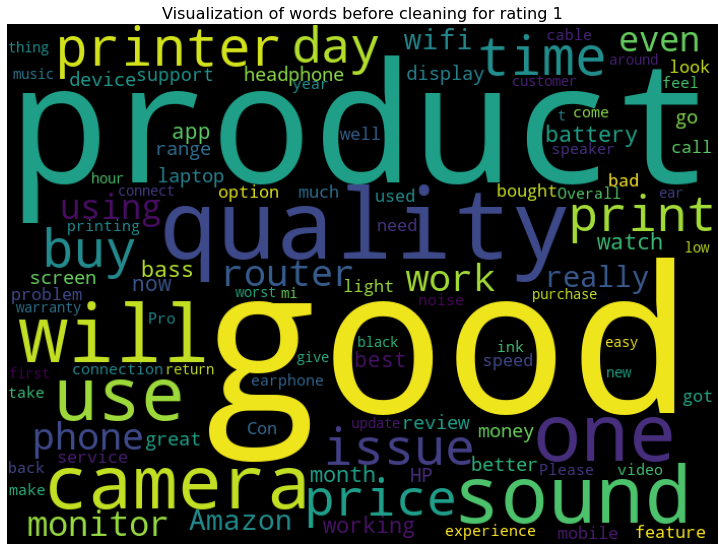

In [28]:
rat3 = df['Full_review'][df['Ratings'] == 3]
news = WordCloud(width = 700, height = 512, max_words = 100, prefer_horizontal=1, collocations= False, ).generate(' '.join(rat3))
plt.figure(figsize = (15,8))
plt.imshow(news)
plt.title('Visualization of words before cleaning for rating 1', fontsize = 16)
plt.tight_layout()
plt.axis('off');

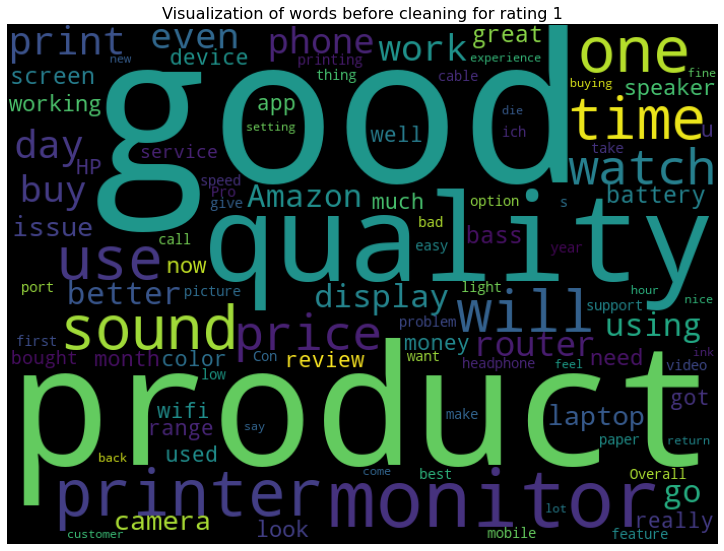

In [29]:
rat4 = df['Full_review'][df['Ratings'] == 4]
news = WordCloud(width = 700, height = 512, max_words = 100, prefer_horizontal=1, collocations= False, ).generate(' '.join(rat4))
plt.figure(figsize = (15,8))
plt.imshow(news)
plt.title('Visualization of words before cleaning for rating 1', fontsize = 16)
plt.tight_layout()
plt.axis('off');

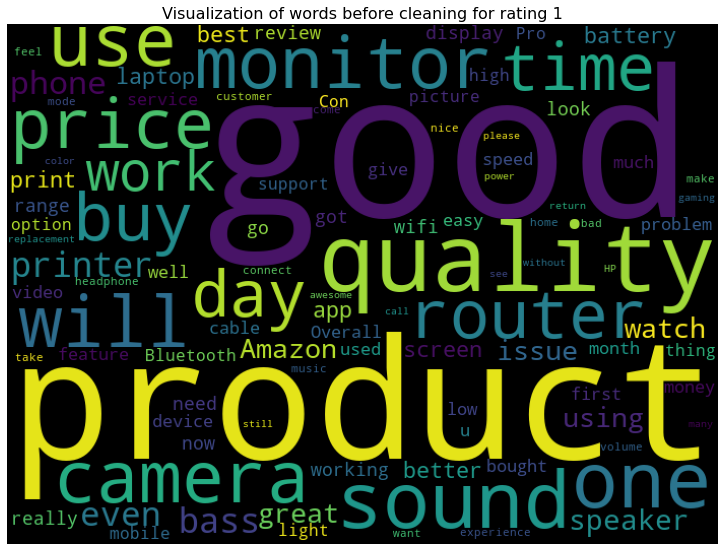

In [30]:
rat5 = df['Full_review'][df['Ratings'] == 5]
news = WordCloud(width = 700, height = 512, max_words = 100, prefer_horizontal=1, collocations= False, ).generate(' '.join(rat5))
plt.figure(figsize = (15,8))
plt.imshow(news)
plt.title('Visualization of words before cleaning for rating 1', fontsize = 16)
plt.tight_layout()
plt.axis('off');

# preprocessing text

In [31]:
#removing html tags
def remove_html_tags(data):
    soup = bs(data, 'html.parser')
    stripped = soup.get_text(separator = '')
    return stripped

In [32]:
#converting accented words
def convert_acc_words(data):
    text = unidecode.unidecode(data)
    return text

In [33]:
#removing stopwords
def remove_stop_words(data):
    stp_words = stopwords.words('english')
    text = data.apply(lambda x : ' '.join(word for word in x.split() if word not in stp_words))
    return text

In [34]:
#removing words less then 2 in length
def remove_small_words(data):
    data = re.sub(r'\b\w{,2}\b', '', data)
    return data

In [35]:
#removing special characters ,numbers, removes trailing spaces and converts to lower case
def remove_punc(data):
    data = data.str.replace(r'[0-9]', ' ')
    data = data.str.lower()
    data = data.str.replace(r'[^a-zA-z]', ' ')
    data = data.apply(lambda x: " ".join(word for word in x.split()))
    return data

In [36]:
#lemmatizing the data
def lemmatize(data):
    lemmatizer = WordNetLemmatizer()
    data = data.apply(lambda x : ' '.join(lemmatizer.lemmatize(word) for word in x.split()))
    return data

In [37]:
df['Full_review'] = df['Full_review'].apply(remove_html_tags)

In [38]:
df['Full_review'] = df['Full_review'].apply(convert_acc_words)

In [39]:
df['Full_review'] = remove_stop_words(df['Full_review'])

In [40]:
df['Full_review'] = df['Full_review'].apply(remove_small_words)

In [41]:
df['Full_review'] = remove_punc(df['Full_review'])

<ipython-input-35-32535de10c00>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  data = data.str.replace(r'[0-9]', ' ')
<ipython-input-35-32535de10c00>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  data = data.str.replace(r'[^a-zA-z]', ' ')


In [42]:
df['Full_review'] = lemmatize(df['Full_review'])

In [43]:
df['Full_review'][1]

'pro build quality display best ever seen amongst laptop keyboard great typing experience fingerprint lightening fast con sound speaker downwards would better surface unfortunately never seen good speaker mid range laptop mac speaker definitely good price tag overall value money yet test battery performance'

In [44]:
df['cleaned_length'] = [len(word.split()) for word in df['Full_review']]

## Visualizing after cleaning data

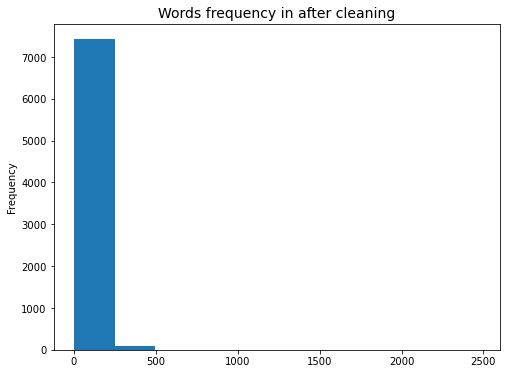

In [45]:
plt.figure(figsize = (8,6))
df['cleaned_length'].plot.hist()
plt.title('Words frequency in after cleaning', fontsize = 14);

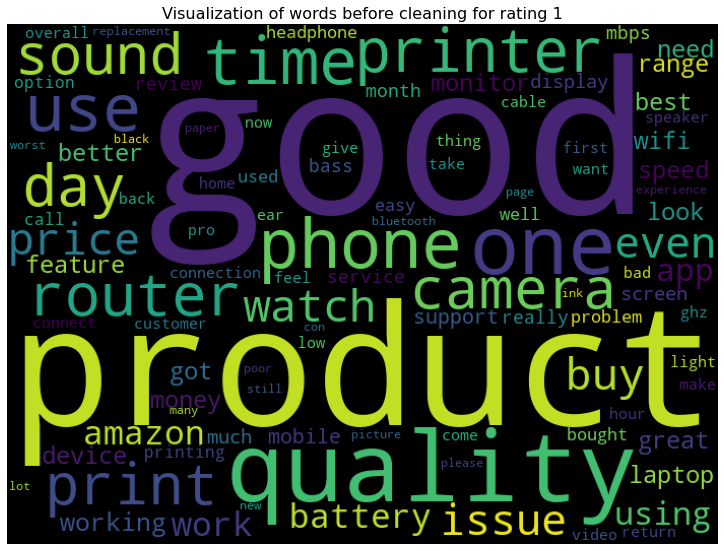

In [46]:
rat1 = df['Full_review'][df['Ratings'] == 1]
news = WordCloud(width = 700, height = 512, max_words = 100, prefer_horizontal=1, collocations= False, ).generate(' '.join(rat1))
plt.figure(figsize = (15,8))
plt.imshow(news)
plt.title('Visualization of words before cleaning for rating 1', fontsize = 16)
plt.tight_layout()
plt.axis('off');

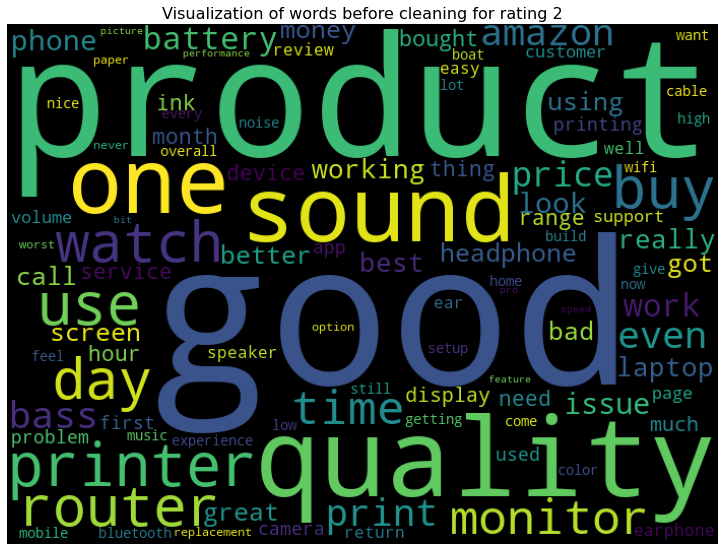

In [47]:
rat2 = df['Full_review'][df['Ratings'] == 2]
news = WordCloud(width = 700, height = 512, max_words = 100, prefer_horizontal=1, collocations= False, ).generate(' '.join(rat2))
plt.figure(figsize = (15,8))
plt.imshow(news)
plt.title('Visualization of words before cleaning for rating 2', fontsize = 16)
plt.tight_layout()
plt.axis('off');

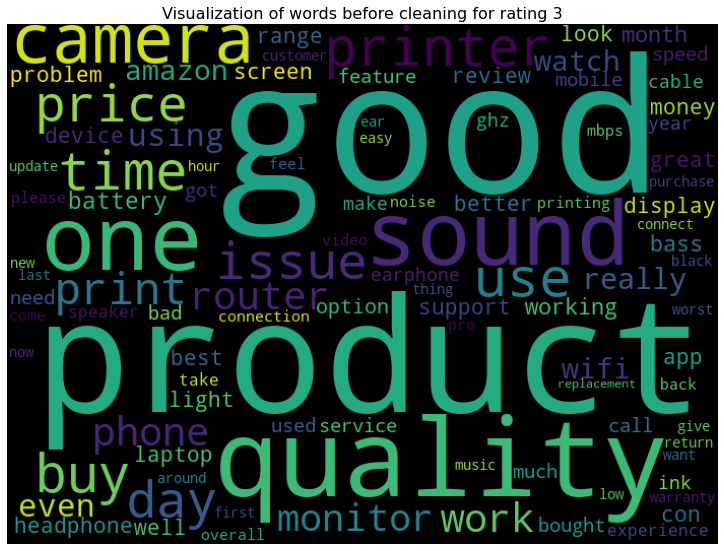

In [48]:
rat3 = df['Full_review'][df['Ratings'] == 3]
news = WordCloud(width = 700, height = 512, max_words = 100, prefer_horizontal=1, collocations= False, ).generate(' '.join(rat3))
plt.figure(figsize = (15,8))
plt.imshow(news)
plt.title('Visualization of words before cleaning for rating 3', fontsize = 16)
plt.tight_layout()
plt.axis('off');

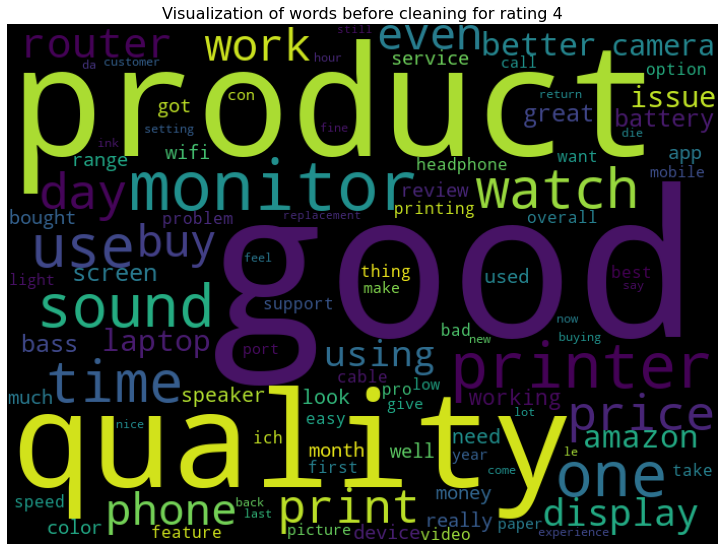

In [49]:
rat4 = df['Full_review'][df['Ratings'] == 4]
news = WordCloud(width = 700, height = 512, max_words = 100, prefer_horizontal=1, collocations= False, ).generate(' '.join(rat4
                                                                                                                          ))
plt.figure(figsize = (15,8))
plt.imshow(news)
plt.title('Visualization of words before cleaning for rating 4', fontsize = 16)
plt.tight_layout()
plt.axis('off');

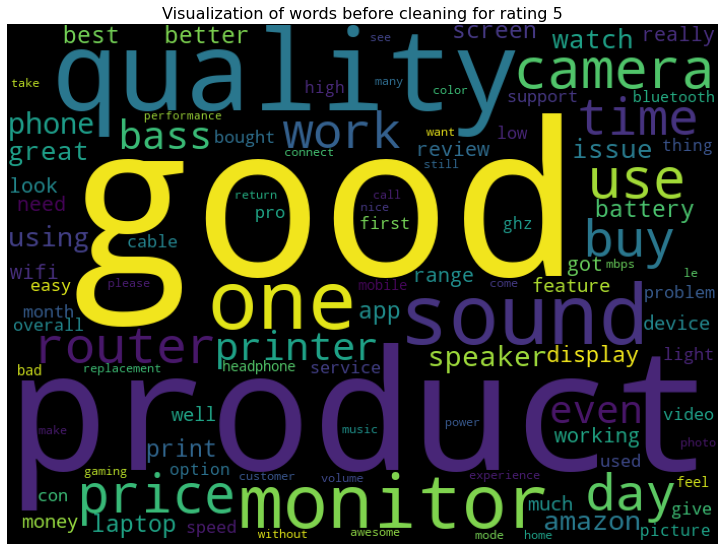

In [50]:
rat5 = df['Full_review'][df['Ratings'] == 5]
news = WordCloud(width = 700, height = 512, max_words = 100, prefer_horizontal=1, collocations= False, ).generate(' '.join(rat5))
plt.figure(figsize = (15,8))
plt.imshow(news)
plt.title('Visualization of words before cleaning for rating 5', fontsize = 16)
plt.tight_layout()
plt.axis('off');

In [51]:
df.isna().sum()

Unnamed: 0        0
Ratings           0
Full_review       0
word_count        0
cleaned_length    0
dtype: int64

In [52]:
df.to_csv('final.csv', index = False)